# ANALISIS DATA SCRAPED

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
import json

# Download stopwords jika belum ada
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# Membaca file JSON (Sesuaikan path dengan struktur JSON-mu)
df = pd.read_json("../../data/processed/data_preprocessed.json")

In [7]:
# Membaca file JSON
with open("../../data/processed/tfidf_features.json", "r") as f:
    data = json.load(f)

# Konversi ke DataFrame
df = pd.DataFrame(data, columns=["title"])

In [8]:
# Menampilkan informasi dasar dataset
print(df.info())

print("===============================")
print(df.describe(include="all"))

print("===============================")
print("Statistik jumlah kata per teks")
print(df['title'].apply(lambda x: len(x.split())).describe())  # Statistik jumlah kata per teks

print("===============================")
print("Statistik panjang karakter per teks")
print(df['title'].apply(lambda x: len(x)).describe())  # Statistik panjang karakter per teks


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   5000 non-null   object
dtypes: object(1)
memory usage: 39.2+ KB
None
       title
count   5000
unique  5000
top       𝐵𝑠
freq       1
Statistik jumlah kata per teks
count    5000.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: title, dtype: float64
Statistik panjang karakter per teks
count    5000.00000
mean        8.28160
std         3.09558
min         2.00000
25%         6.00000
50%         8.00000
75%        10.00000
max        29.00000
Name: title, dtype: float64


In [6]:
# Menggabungkan semua teks menjadi satu
all_text = " ".join(df["title"].dropna())

# Menghitung frekuensi kata setelah membersihkan stopwords dan tanda baca
words = all_text.lower().split()  # Lowercase dan split kata
stop_words = set(stopwords.words("english"))  # Ambil daftar stopwords
filtered_words = [word.strip(string.punctuation) for word in words if word not in stop_words]  # Hapus stopwords & tanda baca
word_counts = Counter(filtered_words)  # Hitung frekuensi kata

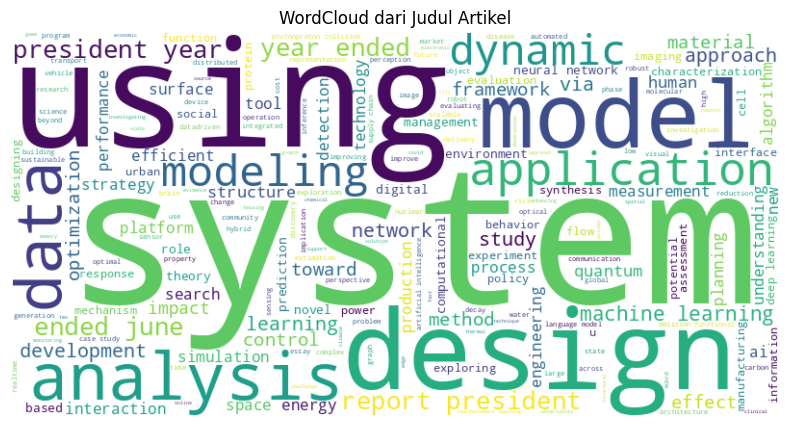

In [7]:
# Membuat wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(" ".join(filtered_words))

# Menampilkan wordcloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud dari Judul Artikel")
plt.show()

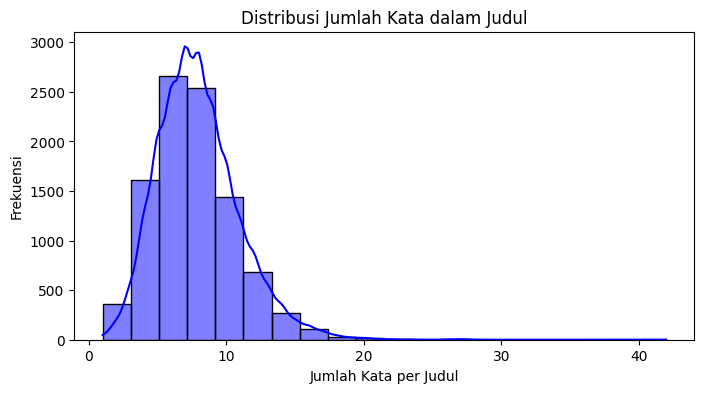

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df['title'].apply(lambda x: len(x.split())), bins=20, kde=True, color='blue')
plt.xlabel("Jumlah Kata per Judul")
plt.ylabel("Frekuensi")
plt.title("Distribusi Jumlah Kata dalam Judul")
plt.show()

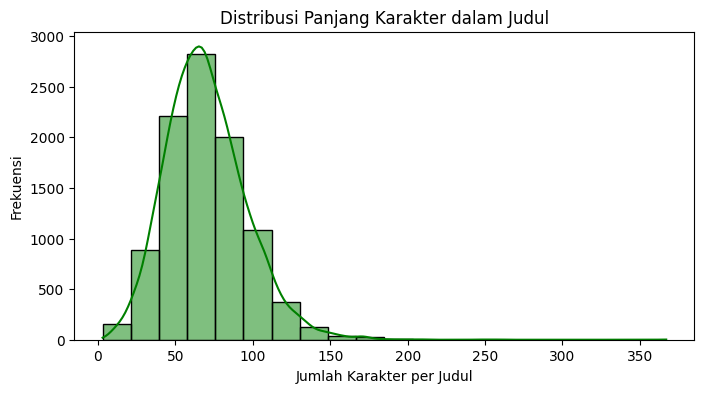

In [9]:
plt.figure(figsize=(8, 4))
sns.histplot(df['title'].apply(lambda x: len(x)), bins=20, kde=True, color='green')
plt.xlabel("Jumlah Karakter per Judul")
plt.ylabel("Frekuensi")
plt.title("Distribusi Panjang Karakter dalam Judul")
plt.show()

/tmp/ipykernel_16258/1452747382.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette="viridis")


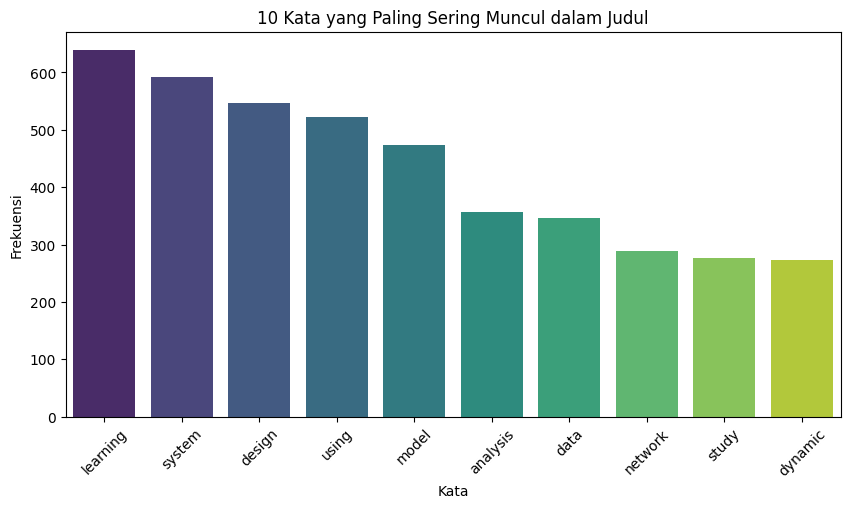

In [10]:
# 10 Kata yang Paling Sering Muncul
common_words = word_counts.most_common(10)
words, counts = zip(*common_words)

plt.figure(figsize=(10, 5))
sns.barplot(x=list(words), y=list(counts), palette="viridis")
plt.xlabel("Kata")
plt.ylabel("Frekuensi")
plt.title("10 Kata yang Paling Sering Muncul dalam Judul")
plt.xticks(rotation=45)
plt.show()